Импорт необходимых библиотек:

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from io import StringIO
from urllib.parse import urlencode
import pingouin as pg

%matplotlib inline

Загрузка датасетов:

In [106]:
# Формирование списка ссылок на файлы на Яндекс Диске:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
file_urls = ['https://disk.yandex.ru/d/UhyYx41rTt3clQ', 
             'https://disk.yandex.ru/d/5Kxrz02m3IBUwQ', 
             'https://disk.yandex.ru/d/Tbs44Bm6H_FwFQ',
             'https://disk.yandex.ru/d/pH1q-VqcxXjsVA']

# Создание пустого списка для хранения ссылок на файлы
final_links = []

# Цикл для скачивания и считывания файлов
for url in file_urls:
    # Получаем загрузочную ссылку
    final_url = base_url + urlencode(dict(public_key=url))
    final_links.append(final_url)
    
    
files_info = [
    {'url': final_links[0], 'delimiter': ';'},
    {'url': final_links[1], 'delimiter': ','},
    {'url': final_links[2], 'delimiter': ','},
    {'url': final_links[3], 'delimiter': ';'}
]

# Функция для загрузки файла с Яндекс Диска и возврата его содержимого
def download_file(url):
    response = requests.get(url, allow_redirects=True)
    actualUrl = response.json()["href"]
    response = requests.get(actualUrl, allow_redirects=True)
    return response.content.decode('utf-8')

# Список для хранения датафреймов
dataframes = []

# Цикл по ссылкам, загрузка каждого файла и сохранение его в датафрейм с учетом разделителя
for file_info in files_info:
    file_content = download_file(file_info['url'])
    df = pd.read_csv(StringIO(file_content), delimiter=file_info['delimiter'])
    dataframes.append(df)

# Теперь у нас есть список датафреймов

for i in dataframes:
    groups = dataframes[0]
    groups_add = dataframes[1]
    active_studs = dataframes[2]
    checks = dataframes[3]

Напишу функцию для разведывательного анализа данных, чтобы посмотреть основные сведения о датафреймах

In [107]:
dataframes = {
    'groups': groups,
    'groups_add': groups_add,
    'active_studs': active_studs,
    'checks':checks
}

def exp_data_analysis(df_name):
    print('-----------------------------------')
    print('Общая информация:')
    print('-----------------------------------')
    print('Имя датафрейма:', df_name)
    print('В датафрейме {} строк и {} столбцов.'.format(dataframes[df_name].shape[0], dataframes[df_name].shape[1]))
    print('-----------------------------------')
    print('Выведем типы данных:')
    print('-----------------------------------')
    print(dataframes[df_name].dtypes)
    print('-----------------------------------')
    print('Проверка на пропущенные значения:')
    print('-----------------------------------')
    print(dataframes[df_name].isna().sum())
    print('-----------------------------------')
    print('Проверка на дубликаты:')
    print('-----------------------------------')
    print(dataframes[df_name].loc[dataframes[df_name].duplicated()])
    print('-----------------------------------')
    print('Выведем первые 5 строк')
    print('-----------------------------------')

### Предварительный анализ данных

Посмотрим, какая информация хранится в наших датасетах, каков размер датасетов. Проверим, есть ли дубликаты и пропущенные значения.

#### groups

Здесь содержится информация о принадлежности пользователя к контрольной или экспериментальной группе

1. id - номер пользователя;
2. grp - обозначение группы. 

In [108]:
exp_data_analysis('groups')
groups.head()

-----------------------------------
Общая информация:
-----------------------------------
Имя датафрейма: groups
В датафрейме 74484 строк и 2 столбцов.
-----------------------------------
Выведем типы данных:
-----------------------------------
id      int64
grp    object
dtype: object
-----------------------------------
Проверка на пропущенные значения:
-----------------------------------
id     0
grp    0
dtype: int64
-----------------------------------
Проверка на дубликаты:
-----------------------------------
Empty DataFrame
Columns: [id, grp]
Index: []
-----------------------------------
Выведем первые 5 строк
-----------------------------------


,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


#### groups_add

Дополнительный файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе. Прислан спустя 2 дня после передачи данных.

1. id - номер пользователя;
2. grp - обозначение группы. 

In [109]:
exp_data_analysis('groups_add')
groups_add.head()

-----------------------------------
Общая информация:
-----------------------------------
Имя датафрейма: groups_add
В датафрейме 92 строк и 2 столбцов.
-----------------------------------
Выведем типы данных:
-----------------------------------
id      int64
grp    object
dtype: object
-----------------------------------
Проверка на пропущенные значения:
-----------------------------------
id     0
grp    0
dtype: int64
-----------------------------------
Проверка на дубликаты:
-----------------------------------
Empty DataFrame
Columns: [id, grp]
Index: []
-----------------------------------
Выведем первые 5 строк
-----------------------------------


,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B


#### active_studs

Файл с информацией о пользователях, которые зашли на сайт в дни проведения эксперимента. 

* student_id - номер пользователя;

In [110]:
exp_data_analysis('active_studs')
active_studs.head()

-----------------------------------
Общая информация:
-----------------------------------
Имя датафрейма: active_studs
В датафрейме 8341 строк и 1 столбцов.
-----------------------------------
Выведем типы данных:
-----------------------------------
student_id    int64
dtype: object
-----------------------------------
Проверка на пропущенные значения:
-----------------------------------
student_id    0
dtype: int64
-----------------------------------
Проверка на дубликаты:
-----------------------------------
Empty DataFrame
Columns: [student_id]
Index: []
-----------------------------------
Выведем первые 5 строк
-----------------------------------


,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


#### checks

Файл с информацией об оплатах пользователей в дни проведения эксперимента.  

* student_id - номер пользователя;
* rev - выручка, полученная от пользователя. 

In [111]:
exp_data_analysis('checks')
checks.head()

-----------------------------------
Общая информация:
-----------------------------------
Имя датафрейма: checks
В датафрейме 541 строк и 2 столбцов.
-----------------------------------
Выведем типы данных:
-----------------------------------
student_id      int64
rev           float64
dtype: object
-----------------------------------
Проверка на пропущенные значения:
-----------------------------------
student_id    0
rev           0
dtype: int64
-----------------------------------
Проверка на дубликаты:
-----------------------------------
Empty DataFrame
Columns: [student_id, rev]
Index: []
-----------------------------------
Выведем первые 5 строк
-----------------------------------


,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0


Согласно проведеному предварительному анализу данных, данные не имеют пропусков и дубликатов. Единственная нестыковка - имена в столбцах обозначения id пользователя различаются в разных таблицах. Предвижу необходимость объединения данных, потому приводим столбцы к единому имени:

In [112]:
active_studs = active_studs.rename(columns = {'student_id':'id'})
checks = checks.rename(columns = {'student_id':'id'})

А также, проверить на дублирование информации в файле groups и более свежем файле groups_add

In [113]:
groups.id.isin(groups_add.id).astype(int).value_counts()

id
0    74484
Name: count, dtype: int64

Данные полностью готовы к дальнейшему исследованию

### Выбор целевых метрик

Чтобы оценить эффективность эксперимента по внедрению новой механики оплаты, буду смотреть на такие метрики как: 

1. CR (конверсия в покупку) - для понимания эффекта изменения выручки в целом; 
2. ARPU (средняя выручка на одного пользователя) - для понимания эффекта изменения выручки за счет привлечения новых пользователей;
3. ARPPU (средняя выручка на одного платящего пользователя) - для понимания эффекта изменения выручки за счет привлеченных пользователей;

In [114]:
# Объединяем данные из groups и groups_add
students_total = pd.concat([groups, groups_add])

# Добавим данные пользователей, зашедших на сайт в дни эксперимента
active_groups = active_studs.merge(students_total, how = 'left', on = 'id')

#Сверим данные об активности студентов в дни эксперимента:
checks['match'] = checks['id'].isin(active_groups.id).astype(int)
checks.query("match == 0").id.count()

149

149 студентов из числа совершивших покупку не заходили на платформу в дни проведения эксперимента. Далее будем смотреть на данные уже без данных записей

In [115]:
#Фильтруем пользователей и сводим данные в общий датасет
checks_active = checks.query("match == 1")
checks_active = checks_active.drop('match', axis=1)
active_students_payments = active_groups.merge(checks_active, how = 'left', on = 'id')
active_students_payments.head()

,id,grp,rev
0,581585,A,NaN
1,5723133,A,NaN
2,3276743,B,NaN
3,4238589,A,NaN
4,4475369,B,NaN


В результате получили датасет со списком всех активных студентов, которые были распределены по группам. Далее добавляю колонку payment с указанием наличия или отсутствия оплаты у каждого из студентов:

<Axes: xlabel='grp', ylabel='id'>

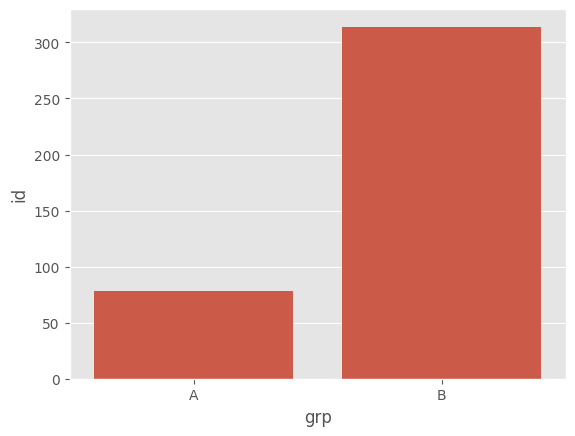

In [116]:
active_students_payments['payment'] = active_students_payments.rev.apply(lambda x: 0 if np.isnan(x) else 1)

# Выясняем количество платежей у каждого пользователя с разбивкой по группам:

merged_df = active_students_payments.groupby(['grp','payment'], as_index = False).agg({'id':'count'})
sns.barplot(data=merged_df.query("payment == 1"), x= 'grp', y='id')

In [117]:
# Рассчитаем метрику СR для каждой группы:

cr_a = (merged_df.query("grp == 'A' and payment == 1").id.count() / active_students_payments.query("grp == 'A'").id.count()) * 100
print(f'CR для контрольной группы - {cr_a.round(3)}') 
cr_b = (merged_df.query("grp == 'B' and payment == 1").id.count() / active_students_payments.query("grp == 'B'").id.count()) * 100
print(f'CR для тестовой группы - {cr_b.round(3)}') 

CR для контрольной группы - 0.065
CR для тестовой группы - 0.015


Таким образом, за время проведения эксперимента в контрольной группе А 78 студентов совершили покупку, а в тестовой группе В - 314 студентов. В тестовой группе совершивших покупку пользователей заметно больше, однако и общее количество наблюдений в группе В значительно превышает количество наблюдений в контрольной группе. 
При этом конверсия в покупку в тестовой группе оказалась меньше, чем в контрольной - 6,5% в группе В и 1,5% в группе А.

### Анализ метрики CR
Для того чтобы оценить, действительно ли новая платформа для оплаты оказала влияние на изменение CR, необходимо проверить статистическую значимость изменений. Наиболее оптимельным тестом для проверки в данном случае будет хи-квадрат, т.к. этот способ лучше всего подходит для оценки качественных метрик по типу конверсии.

НО: CR не зависит от группы, различия статистически не значимы; 

Н1: CR зависит от группы, статистически значимые различия есть.

In [118]:
# Проведем тест хи-квадрат:

exp, obs, stats = pg.chi2_independence(data=active_students_payments, 
                                       x="grp", 
                                       y="payment")
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,0.484808,1.0,0.486252,0.007624,0.107123
1,cressie-read,0.666667,0.482018,1.0,0.487510,0.007602,0.106787
2,log-likelihood,0.000000,0.476541,1.0,0.489993,0.007559,0.106127
3,freeman-tukey,-0.500000,0.472522,1.0,0.491829,0.007527,0.105643
4,mod-log-likelihood,-1.000000,0.468578,1.0,0.493642,0.007495,0.105168
5,neyman,-2.000000,0.460909,1.0,0.497200,0.007434,0.104245


Т.к. p-value = 0.49, это не дает возможности отклонить нулевую гипотезу. Соответственно, обнаруженные в ходе проведения эксперимента различия не являются стат.значимыми, и изменение метрики CR не связано с внедрением новой платформы оплаты.

### Анализ метрик ARPU и ARPPU

In [119]:
# Рассчет ARPU
arpu_a = active_students_payments.query('grp == "A"').rev.sum() / active_students_payments.query('grp == "A"').id.count()
print(f'ARPU для контрольной группы - {arpu_a.round(2)}') 
arpu_b = active_students_payments.query('grp == "B"').rev.sum() / active_students_payments.query('grp == "B"').id.count()
print(f'ARPU для тестовой группы - {arpu_b.round(2)}') 

ARPU для контрольной группы - 47.35
ARPU для тестовой группы - 58.06


In [120]:
# Рассчет ARPPU
arppu_a = active_students_payments.query('grp == "A"').rev.sum() / active_students_payments.query('grp == "A" and rev > 0').id.count()
print(f'ARPPU для контрольной группы - {arppu_a.round(2)}') 
arppu_b = active_students_payments.query('grp == "B"').rev.sum() / active_students_payments.query('grp == "B" and rev > 0').id.count()
print(f'ARPPU для тестовой группы - {arppu_b.round(2)}') 

ARPPU для контрольной группы - 933.59
ARPPU для тестовой группы - 1257.88


<Axes: xlabel='rev', ylabel='Count'>

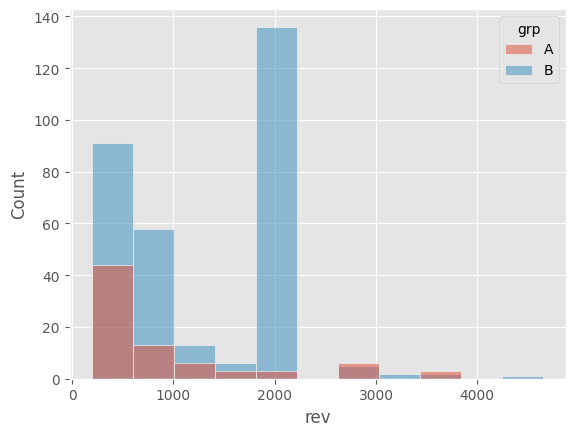

In [121]:
# Визуализируем распределение выручки от активных пользователей по группам:

sns.histplot(data=active_students_payments, x="rev", hue="grp")

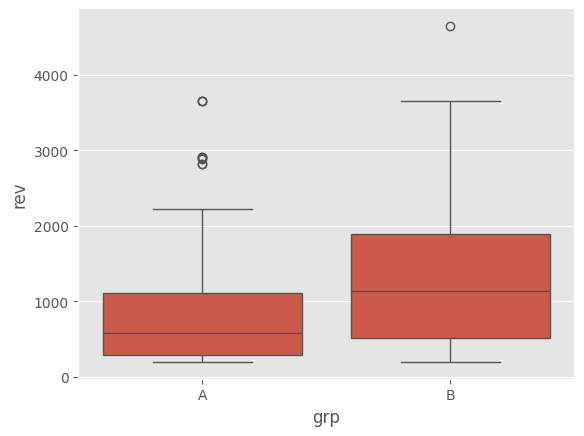

In [122]:
# Также проверим наличие выбросов в данных:

sns.boxplot(data=active_students_payments, y='rev', x='grp')
sns.despine()

Распределение выручки в обеих группах ассиметрично, выбросы в данных присутствуют. 

Значения метрик ARPU и ARPPU в тестовой группе выше, чем в контрольной. Однако необходимо проверить, являются ли обнаруженные изменения статистически значимыми. Поскольку очень сильно различается количество наблюдений в контрольной и тестовой группах, а также данные распределены не нормально, то для анализа метрик ARPU и ARPPU воспользуемся методом bootstrap, который наиболее оптимален в таких случаях.

### Анализ метрики ARPU

Н0: Нет статистически значимых различий в ARPU между контрольной и тестовой группами. 

Н1: Есть статистически значимая разница в ARPU между контрольной и тестовой группами.

In [123]:
# Определим датафреймы для контрольной и тестовой групп:

ARPU_control = active_students_payments.query('grp == "A"')
ARPU_test = active_students_payments.query('grp == "B"')

# Заменим NaN на нули:

ARPU_control['rev'] = ARPU_control['rev'].fillna(0)
ARPU_test['rev'] = ARPU_test['rev'].fillna(0)

C:\Users\Трейд_1\AppData\Local\Temp\ipykernel_15980\1434695326.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ARPU_control['rev'] = ARPU_control['rev'].fillna(0)
C:\Users\Трейд_1\AppData\Local\Temp\ipykernel_15980\1434695326.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ARPU_test['rev'] = ARPU_test['rev'].fillna(0)


In [124]:
# Напишем функцию для поверки гипотез при помощи метода bootstrap:

plt.style.use('ggplot')
def get_bootstrap(
    data_column_1, # числовые значения тестовой выборки
    data_column_2, # числовые значения контрольной выборки
    boot_it = 10000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, # чтобы сохранить дисперсию, берем такой же размер выборки
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"quants": quants, 
            "p_value": p_value}

100%|██████████| 10000/10000 [00:05<00:00, 1859.83it/s]


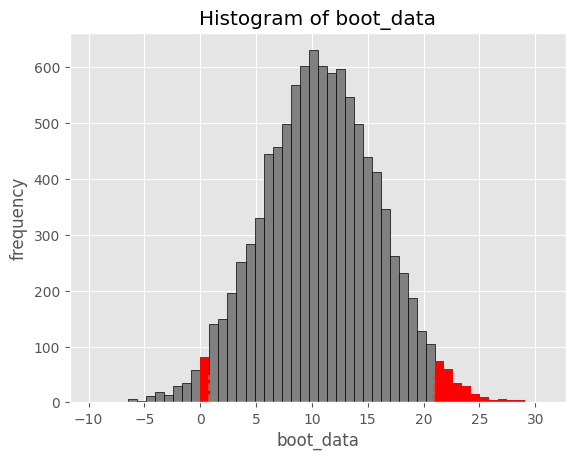

p_value -  0.038
               0
0.025   0.772281
0.975  20.966725


In [125]:
ARPU_bootstrap = get_bootstrap(ARPU_test.rev, ARPU_control.rev)
print('p_value - ', ARPU_bootstrap['p_value'].round(3))
print(ARPU_bootstrap['quants'])

Значение p-value меньше 0.05 и доверительный интервал не включает в себя 0, следовательно, мы отвергаем нулевую гипотезу и делаем вывод, что различия метрик ARPU в двух группах статистически значимы.

### Анализ метрики ARPPU. 

Н0: Нет статистически значимых различий в ARPPU между контрольной и тестовой группами. 

Н1: Есть статистически значимая разница в ARPPU между контрольной и тестовой группами.

100%|██████████| 10000/10000 [00:02<00:00, 3870.21it/s]


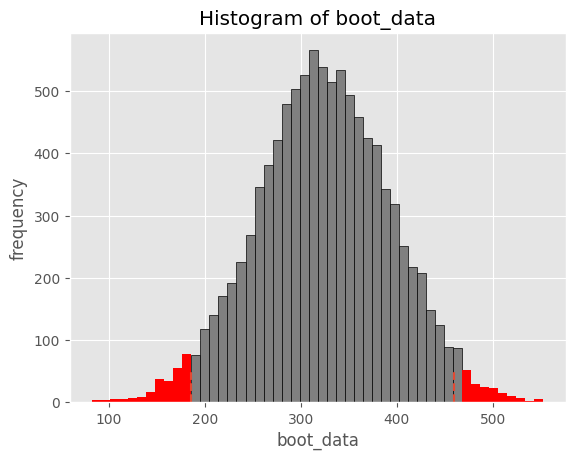

p_value -  0.0
                0
0.025  185.569915
0.975  459.168960


In [126]:
# Определим датафреймы для контрольной и тестовой групп:
ARPPU_control = active_students_payments.query('grp == "A" and rev > 0') 
ARPPU_test = active_students_payments.query('grp == "B" and rev > 0') 

#Запуск bootstrap
ARPPU_bootstrap = get_bootstrap(ARPPU_test.rev, ARPPU_control.rev)
print('p_value - ', ARPPU_bootstrap['p_value'].round(5))
print(ARPPU_bootstrap['quants'])


Значение p-value меньше 0.05 и 0 не попадает в доверительный интервал, значит, мы отвергаем нулевую гипотезу и делаем вывод, что различия метрик ARPPU в выборках статистически значимы.

### Общий вывод

Таким образом мы можем сделать следующий выводы:

1. при внедрении новой механики оплаты снизилась конверсия в покупку (CR), но эти изменения оказались статистически не значимыми; 
2. Метрики ARPU и ARPPU в тестовой группе с использованием новой системы оплаты оказались выше, подтвердилась статистическая значимость обнаруженных изменений. 

С учетом вышеперечисленного, новую систему оплаты можно применять ко всем пользователям сайта, т.к. есть подтвержденные положительные изменения метрик. 